# Codecademy project Biodiversity

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
obs = pd.read_csv('observations.csv')
sp = pd.read_csv('species_info.csv')

In [27]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [28]:
sp.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [29]:
print(obs.shape)
print(sp.shape)

(23296, 3)
(5824, 4)


In [30]:
print(obs.info())
print(sp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


### Drop duplicates

In [31]:
sp[sp.duplicated()]

,category,scientific_name,common_names,conservation_status


In [32]:
obs[obs.duplicated()]

,scientific_name,park_name,observations
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
8710,Streptopelia decaocto,Yellowstone National Park,255
10038,Plantago major,Great Smoky Mountains National Park,90
10674,Arctium minus,Yosemite National Park,162
12381,Eleocharis palustris,Great Smoky Mountains National Park,62
13372,Hesperis matronalis,Bryce National Park,124
16741,Prunella vulgaris,Great Smoky Mountains National Park,75
17378,Potentilla norvegica,Yosemite National Park,148
17577,Spilogale putorius,Yellowstone National Park,256
18141,Poa compressa,Great Smoky Mountains National Park,80


In [33]:
obs.drop_duplicates(keep='first', inplace=True)

### Explore categorical variables

In [34]:
print("park names" + str(obs.park_name.unique()))
print("categories" + str(sp.category.unique()))
print("conservation status" + str(sp.conservation_status.unique()))

park names['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
categories['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
conservation status[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [35]:
sp.conservation_status.fillna('no_status', inplace=True)
print("conservation status" + str(sp.conservation_status.unique()))

conservation status['no_status' 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


<AxesSubplot:title={'center':' Histogram of the conservation status'}, xlabel='conservation_status', ylabel='frequency'>

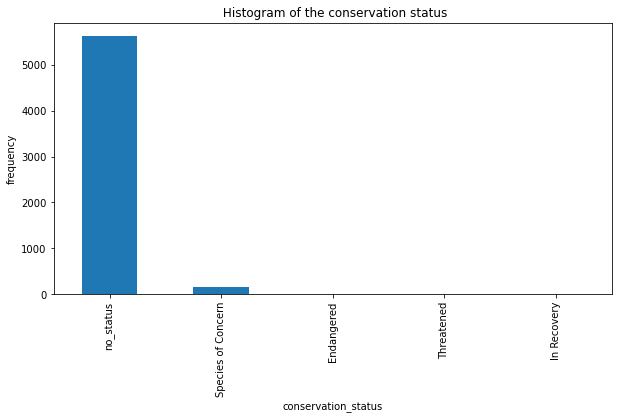

In [36]:
plt.figure(figsize=(10,5))
plt.xlabel('conservation_status')
plt.ylabel('frequency')
plt.title(" Histogram of the conservation status")
sp.conservation_status.value_counts().plot.bar()

In this chart, it can be seen that most of the observations in the dataset don't have any conservation status.

<AxesSubplot:title={'center':'Conservation status without no status'}, xlabel='conservation_status', ylabel='frequency'>

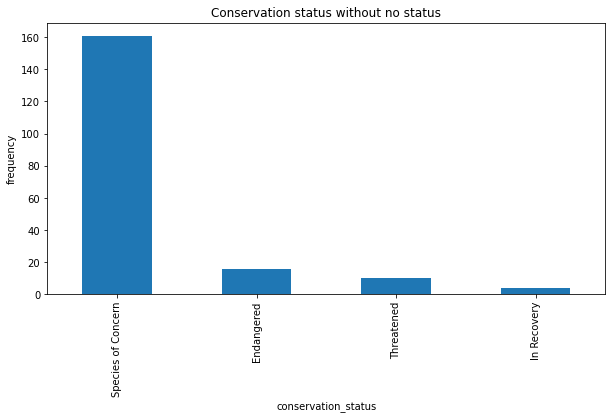

In [37]:
plt.figure(figsize=(10,5))
plt.xlabel('conservation_status')
plt.ylabel('frequency')
plt.title("Conservation status without no status")
sp.conservation_status[sp.conservation_status != 'no_status'].value_counts().plot.bar()

Here is the chart showing the quantity of observations with some conservation status. The biggest group of these observations is related to species of concern.

<AxesSubplot:title={'center':' Histogram of the categories'}, xlabel='category', ylabel='frequency'>

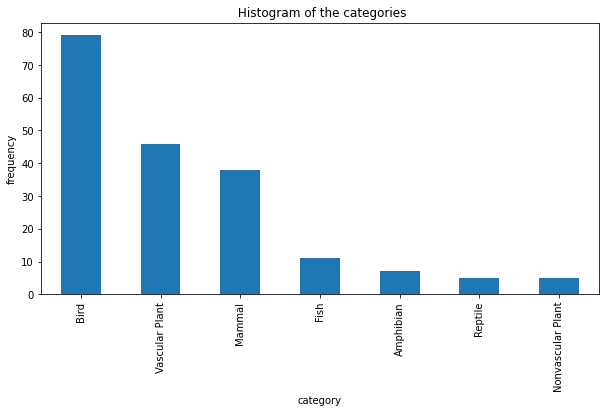

In [38]:
plt.figure(figsize=(10,5))
plt.xlabel('category')
plt.ylabel('frequency')
plt.title(" Histogram of the categories")
sp.category[sp.conservation_status != 'no_status'].value_counts().plot.bar()

Based on the chart we can see that the biggest category in this dataset is Vascular Plant and the smallest is Reptilie.

In [39]:
conservation_category = sp[sp.conservation_status != "no_status"]\
    .groupby(["conservation_status", "category"]).agg(number=('scientific_name', 'nunique'))
conservation_category = pd.DataFrame(conservation_category)
conservation_category.reset_index(inplace=True)
conservation_category

,conservation_status,category,number
0,Endangered,Amphibian,1
1,Endangered,Bird,4
2,Endangered,Fish,3
3,Endangered,Mammal,6
4,Endangered,Vascular Plant,1
5,In Recovery,Bird,3
6,In Recovery,Mammal,1
7,Species of Concern,Amphibian,4
8,Species of Concern,Bird,68
9,Species of Concern,Fish,4


<AxesSubplot:xlabel='conservation_status', ylabel='number'>

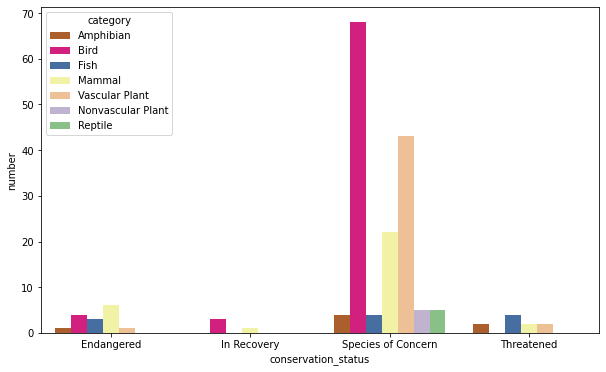

In [40]:
plt.figure(figsize= (10, 6))
sns.barplot(x='conservation_status', y ='number', hue='category', data=conservation_category, palette= 'Accent_r' )


This chart shows the number of observations for each conservation status and category. All categories are presented only in the Species of Concern intervention status, and the smallest number of categories are in recovery conservation status. 
Mammals are the only category that appears in every conservation status.

In [41]:
sp['no_conservate']= (sp.conservation_status == 'no_status')
sp.head()

,category,scientific_name,common_names,conservation_status,no_conservate
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,no_status,True
1,Mammal,Bos bison,"American Bison, Bison",no_status,True
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",no_status,True
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",no_status,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,no_status,True


In [42]:
conservation_dif= sp.groupby(["category", "no_conservate"]).agg(number=('scientific_name', 'nunique'))
conservation_dif = pd.DataFrame(conservation_dif)
conservation_dif.reset_index(inplace=True)
conservation_dif

,category,no_conservate,number
0,Amphibian,False,7
1,Amphibian,True,72
2,Bird,False,75
3,Bird,True,413
4,Fish,False,11
5,Fish,True,115
6,Mammal,False,30
7,Mammal,True,146
8,Nonvascular Plant,False,5
9,Nonvascular Plant,True,328


<AxesSubplot:xlabel='category', ylabel='number'>

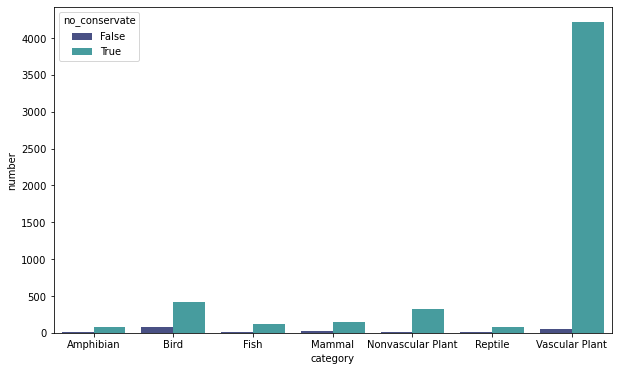

In [43]:
plt.figure(figsize= (10, 6))
sns.barplot(x='category', y ='number', hue='no_conservate', data=conservation_dif, palette= 'mako' )

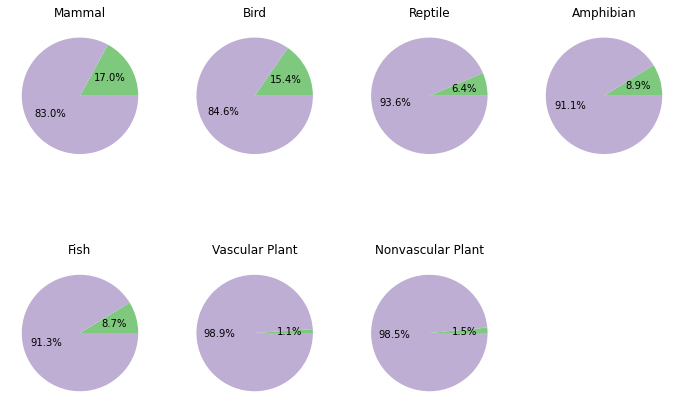

In [44]:
categories = sp.category.unique()
plt.figure(figsize= (12, 8))
colors = sns.color_palette('Accent')[0:2]
for i in range(0, len(categories)):
    plt.subplot(2, 4, i+1)
    plt.pie(x =conservation_dif[conservation_dif.category== categories[i]]['number'],
                autopct='%1.1f%%', colors=colors)
    plt.title(categories[i])

According to these charts, we can select several groups of categories. The first is mammals and birds, because they both have the biggest percentage of observations with intervention status among other categories. The next group includes reptiles, amphibians and fishes. And the last one is plants. They have the smallest percentage of observations with conservation status.

To explore some diferenties between species and their conservation status let's take a  chi squared test

In [61]:
d= {}
for i in range(0, len(conservation_dif.category), 2):
    for j in range(0, len(conservation_dif.category), 2):
        if(i != j):
            contingency1 = [[conservation_dif.number[i], conservation_dif.number[i+1]],
                         [conservation_dif.number[j], conservation_dif.number[j+1]]]
            ch2, pval, dof, exp = chi2_contingency(contingency1)
            d[conservation_dif.category[i], conservation_dif.category[j]] = pval   
for val in d:
    if(d[val] < 0.05):
        print('{0} - {1:1.4f}'.format(val, d[val]))

('Amphibian', 'Nonvascular Plant') - 0.0018
('Amphibian', 'Vascular Plant') - 0.0000
('Bird', 'Nonvascular Plant') - 0.0000
('Bird', 'Vascular Plant') - 0.0000
('Fish', 'Nonvascular Plant') - 0.0005
('Fish', 'Vascular Plant') - 0.0000
('Mammal', 'Nonvascular Plant') - 0.0000
('Mammal', 'Reptile') - 0.0384
('Mammal', 'Vascular Plant') - 0.0000
('Nonvascular Plant', 'Amphibian') - 0.0018
('Nonvascular Plant', 'Bird') - 0.0000
('Nonvascular Plant', 'Fish') - 0.0005
('Nonvascular Plant', 'Mammal') - 0.0000
('Nonvascular Plant', 'Reptile') - 0.0336
('Reptile', 'Mammal') - 0.0384
('Reptile', 'Nonvascular Plant') - 0.0336
('Reptile', 'Vascular Plant') - 0.0001
('Vascular Plant', 'Amphibian') - 0.0000
('Vascular Plant', 'Bird') - 0.0000
('Vascular Plant', 'Fish') - 0.0000
('Vascular Plant', 'Mammal') - 0.0000
('Vascular Plant', 'Reptile') - 0.0001


Results of the test show that there are statistically significant differences between all plants and all animals and between mammals and reptiles. Other categorical pairs are independent. 

In [28]:
import string
punc = '['+string.punctuation+']'
animals = sp[(sp.category != 'Vascular Plant') & (sp.category != 'Nonvascular Plant')]\
        .common_names.str.replace(punc, '', regex=True).str.split()
animals

0                              [Gappers, RedBacked, Vole]
1                                [American, Bison, Bison]
2       [Aurochs, Aurochs, Domestic, Cattle, Feral, Do...
3       [Domestic, Sheep, Mouflon, Red, Sheep, Sheep, ...
4                                       [Wapiti, Or, Elk]
                              ...                        
4610                                           [Hardhead]
4611                             [Sacramento, Pikeminnow]
4612                         [Lahontan, Cutthroat, Trout]
4613                          [California, Golden, Trout]
4614                                    [Riffle, Sculpin]
Name: common_names, Length: 1021, dtype: object

In [29]:
clean_rows = []

for item in animals:
    item = list(dict.fromkeys(item))
    clean_rows.append(item)

clean_row = [item for sublist in clean_rows for item in sublist]   
clean_row[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [46]:
animals_data = pd.DataFrame(data= clean_row, columns = ['animal'])
animals_number = animals_data.animal.value_counts().sort_values(ascending = False)
animals_number.head(10)

Warbler       59
Northern      53
Salamander    41
Eastern       39
American      37
Western       31
Common        31
Sparrow       29
Snake         28
Bat           23
Name: animal, dtype: int64

Here are the ten most popular words in animal common names. There are some animals' titles and additional words like Western, common and others. So the most popular animals are Warbler, Salamander, Sparrow, Snake and Bat.

In [51]:
sp['is_warbler'] = sp.common_names.str.contains(r"\bWarbler\b", regex = True)

warb_df=pd.merge(obs, sp[sp.is_warbler==True]) 
warb_df

,scientific_name,park_name,observations,category,common_names,conservation_status,no_conservate,is_warbler
0,Vermivora celata,Yosemite National Park,106,Bird,Orange-Crowned Warbler,no_status,True,True
1,Vermivora celata,Great Smoky Mountains National Park,76,Bird,Orange-Crowned Warbler,no_status,True,True
2,Vermivora celata,Yellowstone National Park,281,Bird,Orange-Crowned Warbler,no_status,True,True
3,Vermivora celata,Bryce National Park,121,Bird,Orange-Crowned Warbler,no_status,True,True
4,Setophaga dominica,Yosemite National Park,140,Bird,Yellow-Throated Warbler,no_status,True,True
...,...,...,...,...,...,...,...,...
231,Oreothlypis virginiae,Bryce National Park,84,Bird,Virginia's Warbler,no_status,True,True
232,Setophaga petechia,Great Smoky Mountains National Park,82,Bird,Yellow Warbler,no_status,True,True
233,Setophaga petechia,Yellowstone National Park,245,Bird,Yellow Warbler,no_status,True,True
234,Setophaga petechia,Bryce National Park,134,Bird,Yellow Warbler,no_status,True,True


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Yosemite National Park'),
  Text(1, 0, 'Great Smoky Mountains National Park'),
  Text(2, 0, 'Yellowstone National Park'),
  Text(3, 0, 'Bryce National Park')])

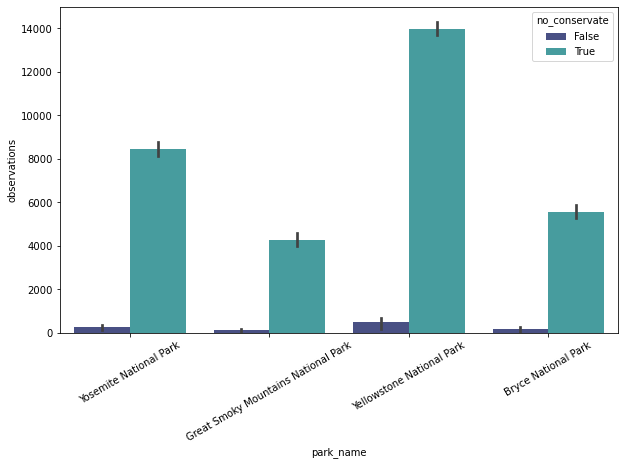

In [60]:
plt.figure(figsize= (10, 6))
sns.barplot(x='park_name', y ='observations', hue='no_conservate', data=warb_df, estimator=sum, palette= 'mako' )
plt.xticks(rotation=30)

There is a barplot about warblers in different parks and their conservation status.

- What is the distribution of conservation status for species?

        The vast majority of species were not part of conservation.(5,633 vs 191)

- Are certain types of species more likely to be endangered?

        Mammals and birds have the biggest amount of endangered species. 

- Are the differences between species and their conservation status significant?

        The difference between plants and animals is significant and the difference between mammals and reptiles is too. 

- Which animal is most prevalent and what is their distribution among parks?

            The most prevalent animal is a warbler and the park with the biggest amount of birds is in Yellowstone National Park. The smallest number of observations of these birds is in Great Smoky Mountains National Park.